In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# My modules
from utils import *

# Notebook Settings
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_parquet('data/n_forecast_preprocessed.parquet', engine='pyarrow', dtype_backend='numpy_nullable')

In [3]:
data.head()

,sales_date,store_hashed,n_transactions,store_format,zipcode_region,region,holiday_saint_nicholas,holiday_first_christmas,holiday_liberation_day,holiday_good_friday,...,holiday_valentines_day,autumn_school_holiday,summer_school_holiday,spring_school_holiday,christmas_school_holiday,may_school_holiday,easter_school_holiday,datetime_store_open,datetime_store_closed,working_hours
0,2019-01-02,b9d487a30398d42ecff55c228ed5652b,6570,19,68,south,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 20:00:00,12.0
1,2019-01-02,c3e0c62ee91db8dc7382bde7419bb573,1773,6,30,middle,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 20:00:00,12.0
2,2019-01-02,90db9da4fc5414ab55a9fe495d555c06,8783,19,10,north,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 22:00:00,14.0
3,2019-01-02,07042ac7d03d3b9911a00da43ce0079a,5391,19,10,north,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 22:00:00,14.0
4,2019-01-02,b60c5ab647a27045b462934977ccad9a,2789,6,96,north,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 20:00:00,12.0


In [4]:
data.set_index('sales_date', inplace=True)
data.sort_index(inplace=True)
# convert to float the n_transactions column
data['n_transactions'] = data['n_transactions'].astype(float)

In [5]:
data.head()

,store_hashed,n_transactions,store_format,zipcode_region,region,holiday_saint_nicholas,holiday_first_christmas,holiday_liberation_day,holiday_good_friday,holiday_new_years_day,...,holiday_valentines_day,autumn_school_holiday,summer_school_holiday,spring_school_holiday,christmas_school_holiday,may_school_holiday,easter_school_holiday,datetime_store_open,datetime_store_closed,working_hours
sales_date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,a58149d355f02887dfbe55ebb2b64ba3,1142.0,19,56,south,0,0,0,0,1,...,0,0,0,0,1,0,0,2019-01-01 12:00:00,2019-01-01 18:00:00,6.0
2019-01-01,bb57db42f77807a9c5823bd8c2d9aaef,3761.0,19,10,north,0,0,0,0,1,...,0,0,0,0,1,0,0,2019-01-01 11:00:00,2019-01-01 22:00:00,11.0
2019-01-01,3a09a524440d44d7f19870070a5ad42f,1681.0,16,10,north,0,0,0,0,1,...,0,0,0,0,1,0,0,2021-01-19 08:30:00,2021-01-19 18:00:00,9.5
2019-01-01,28e209b61a52482a0ae1cb9f5959c792,3124.0,19,24,middle,0,0,0,0,1,...,0,0,0,0,1,0,0,2019-01-01 12:00:00,2019-01-01 18:00:00,6.0
2019-01-01,1cecc7a77928ca8133fa24680a88d2f9,2534.0,19,10,north,0,0,0,0,1,...,0,0,0,0,1,0,0,2019-01-01 10:00:00,2019-01-01 20:00:00,10.0


In [6]:
# Plot all the RAW time series
# plt.figure(figsize=(16, 6))
# plt.plot(data['n_transactions'])
# plt.show()

In [7]:
data['store_hashed'].nunique()

595

There are 595 stores in the dataset that we want to forecast number of transactions for.

# Consider one store as an example.

In [8]:
# Let's take a look at the sales of one of them.
store = data[data['store_hashed'] == 'b60c5ab647a27045b462934977ccad9a']

In [9]:
# # convert store['n_transactions'] to float
store['n_transactions'] = store['n_transactions'].astype(float)

/var/folders/fb/8kv9fzd150x21s0r26nbx63c0000gn/T/ipykernel_68603/93597649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['n_transactions'] = store['n_transactions'].astype(float)


# Simple Moving Average Model

In [10]:
# Forecast for full time series 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

model = ARIMA(store['n_transactions'], order=(0, 0, 1))
model_fit = model.fit()

forecast_ma = model_fit.predict()

# Get the actual sales for the forecast period
actual = store['n_transactions']

mse = mean_squared_error(actual, forecast_ma)
mae = mean_absolute_error(actual, forecast_ma)
mape = mean_absolute_percentage_error(actual, forecast_ma)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'RMSE: {rmse:.3f}')


# plot the forecast vs actual
plt.figure(figsize=(16, 6))
plt.plot(store['n_transactions'], label='Actual')
plt.plot(forecast_ma, label='Forecast')
plt.legend()
plt.show()

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE: 507737.443
MAE: 437.533
MAPE: 0.464
RMSE: 712.557


KeyboardInterrupt: 

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

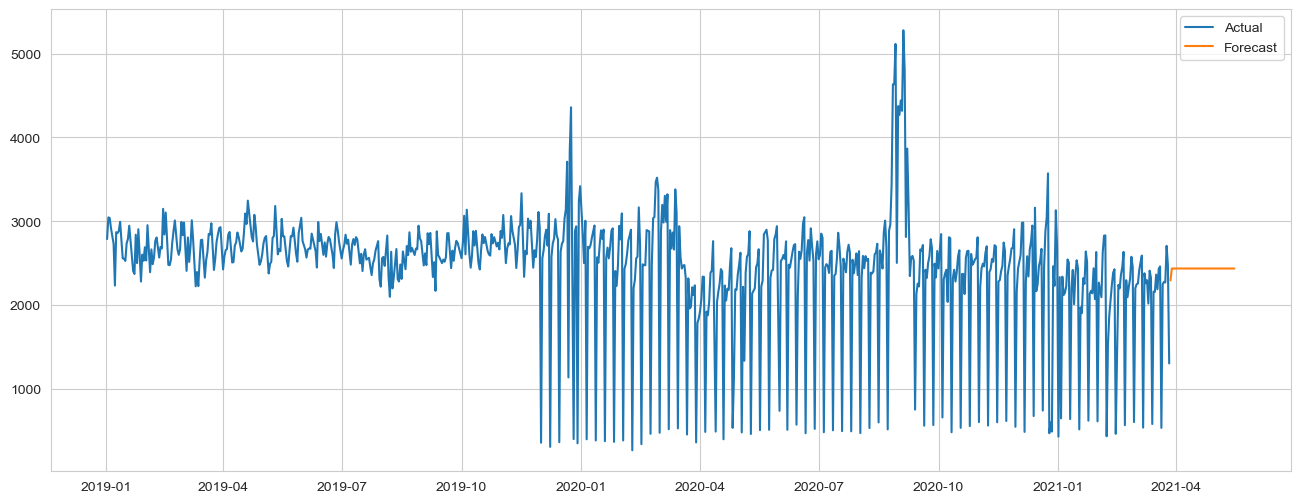

In [ ]:
# Forecast for next 50 days with MA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# create empty future dataframe
future = pd.DataFrame(index=pd.date_range(start='2021-03-28', periods=50, freq='D'), columns=['n_transactions'])
future.sort_index(inplace=True)

model = ARIMA(store['n_transactions'], order=(0, 0, 1))
model_fit = model.fit()


# forecast for the next 50 days of future
forecast_future = model_fit.forecast(steps=50)

# Reset the index of forecast_future
forecast_future.index = future.index

# Fill the future dataframe with the forecast
future['n_transactions'] = forecast_future

# Get the actual sales for the forecast period
actual = store['n_transactions']#.iloc[-50:]

# plot the forecast vs actual
plt.figure(figsize=(16, 6))
plt.plot(store['n_transactions'], label='Actual')
plt.plot(future, label='Forecast')
plt.legend()
plt.show()


# ARIMA model (AutoRegressive Integrated Moving Average)

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

MSE: 225093.196
MAE: 293.948
MAPE: 0.224
RMSE: 474.440
AIC: 11507.846
BIC: 11549.545


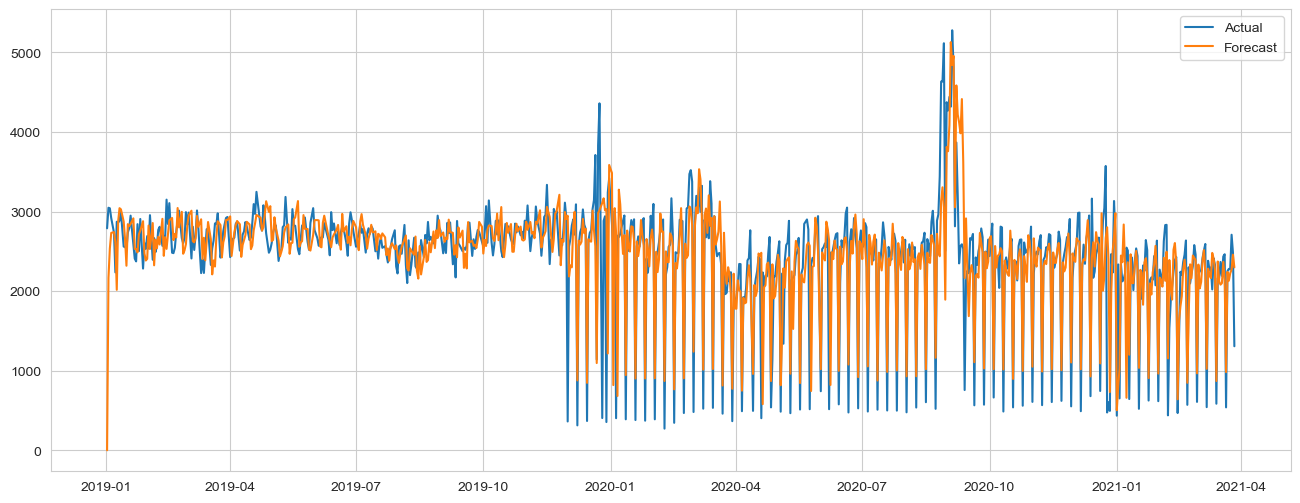

In [23]:
# Forecast for full time series 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

model = ARIMA(store['n_transactions'], order=(7, 1, 1))
model_fit = model.fit()

forecast_arima = model_fit.predict()

# Get the actual sales for the forecast period
actual = store['n_transactions']

mse = mean_squared_error(actual, forecast_arima)
mae = mean_absolute_error(actual, forecast_arima)
mape = mean_absolute_percentage_error(actual, forecast_arima)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'RMSE: {rmse:.3f}')
# AIC - Akaike Information Criterion
print(f'AIC: {model_fit.aic:.3f}')
# BIC - Bayesian Information Criterion
print(f'BIC: {model_fit.bic:.3f}')

# plot the forecast vs actual
plt.figure(figsize=(16, 6))
plt.plot(store['n_transactions'], label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.legend()
plt.show()

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

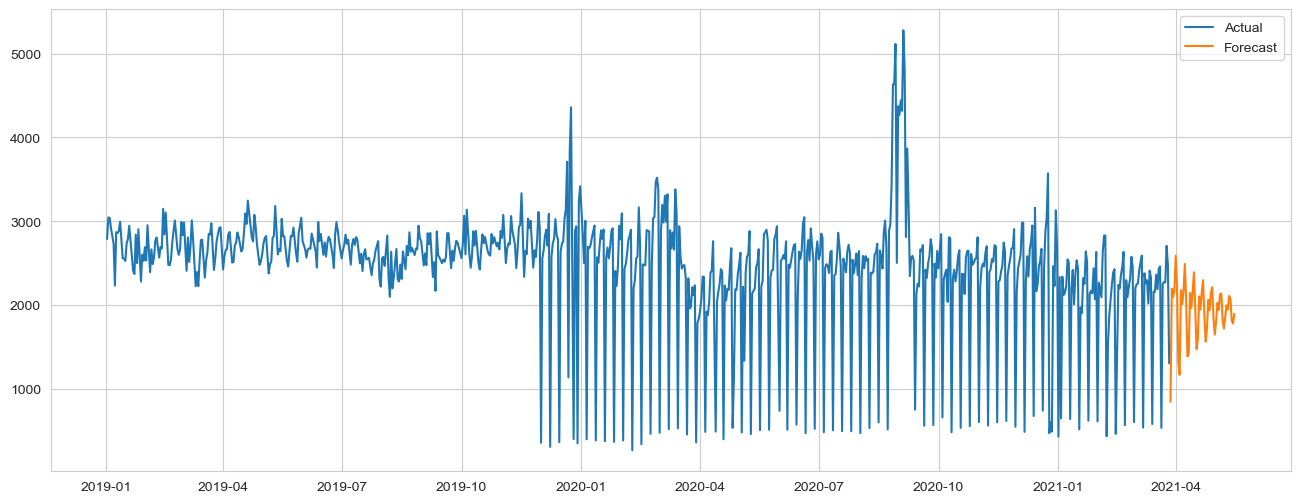

In [ ]:
# Forecast for next 50 days
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# create empty future dataframe
future = pd.DataFrame(index=pd.date_range(start='2021-03-28', periods=50, freq='D'), columns=['n_transactions'])
future.sort_index(inplace=True)

model = ARIMA(store['n_transactions'], order=(7, 1, 1))
model_fit = model.fit()

# WHAT IS THE DIFFERENCE BETWEEN .fit().predict() and .fit().forecast() ???
# forecast for the next 50 days of future
forecast_future = model_fit.forecast(steps=50)

# Reset the index of forecast_future
forecast_future.index = future.index

# Fill the future dataframe with the forecast
future['n_transactions'] = forecast_future

# Get the actual sales for the forecast period
actual = store['n_transactions']#.iloc[-50:]

# plot the forecast vs actual
plt.figure(figsize=(16, 6))
plt.plot(store['n_transactions'], label='Actual')
plt.plot(future, label='Forecast')
plt.legend()
plt.show()


# AUTOARIMA model - automatically find the best parameters for an ARIMA model 

In [ ]:
# AUTO ARIMA model: auto_arima
# from pmdarima.arima import auto_arima
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# model = auto_arima(store['n_transactions'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
# model.fit(store['n_transactions'])
# p, d, q = model.order
# forecast_auto = model.predict(n_periods=50)



# Forecasting for all stores

1. First of all we need to make all stores data stationary to be able to use ARIMA model. We will use differencing to make data stationary.
2. Then we will use auto_arima function to find the best parameters for ARIMA model.
3. Finally we will use ARIMA model to forecast number of transactions for each store.



# Check stationarity for each store

In [ ]:
stationary_stores, non_stationary_stores = test_stores_stationarity(data, plot=False)

In [ ]:
# test stationarity of the store
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

check_stationarity(store['n_transactions'])

The series is stationary


# Make every store time series stationary

In [11]:
def make_stationary(data, non_stationary_stores):
    stationary_data = data.copy()
    
    for store in non_stationary_stores:
        store_data = data[data['store_hashed'] == store]
        diff = store_data['n_transactions'].diff().dropna()
        
        # Re-run Dickey-Fuller test
        dftest = adfuller(diff, autolag='AIC', maxlag=12)
        
        if dftest[1] < 0.05:
            # print(f'Store {store} is now stationary')
            stationary_data.loc[store_data.index, 'n_transactions'] = diff
        else:
            print(f'Store {store} is still non-stationary')
            
    return stationary_data

In [13]:
stationary_data = make_stationary(data, non_stationary_stores)

In [14]:
stationary_data = stationary_data.dropna()

In [15]:
# test stationarity again
stationary_stores, non_stationary_stores = test_stores_stationarity(stationary_data, plot=False)

Stationary stores: 595
Non stationary stores: 0


In [16]:
len(stationary_data)

708983

# Find the Autocorrelation and Partial Autocorrelation of each store

In [2]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Find the Autocorrelation and Partial Autocorrelation for each store, 
# and use the highest value as the lag for the ARIMA model. 
# This will be done for each store individually.
# To be used in the SARIMA/ARIMA models
# To be continued...

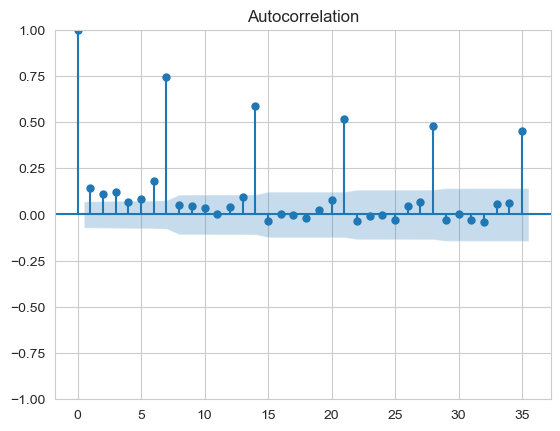

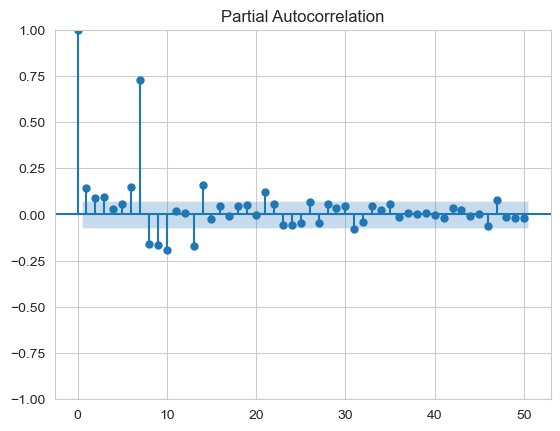

In [13]:
# autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(store['n_transactions'], lags=35)
plot_pacf(store['n_transactions'], lags=50)
plt.show()



# SARIMAX

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29855D+00    |proj g|=  1.83028D+00

At iterate    5    f=  7.55692D+00    |proj g|=  3.99761D-02

At iterate   10    f=  7.55301D+00    |proj g|=  2.86811D-02

At iterate   15    f=  7.55005D+00    |proj g|=  3.30884D-02

At iterate   20    f=  7.54938D+00    |proj g|=  1.02959D-02

At iterate   25    f=  7.54918D+00    |proj g|=  8.77384D-04

At iterate   30    f=  7.54918D+00    |proj g|=  8.10449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

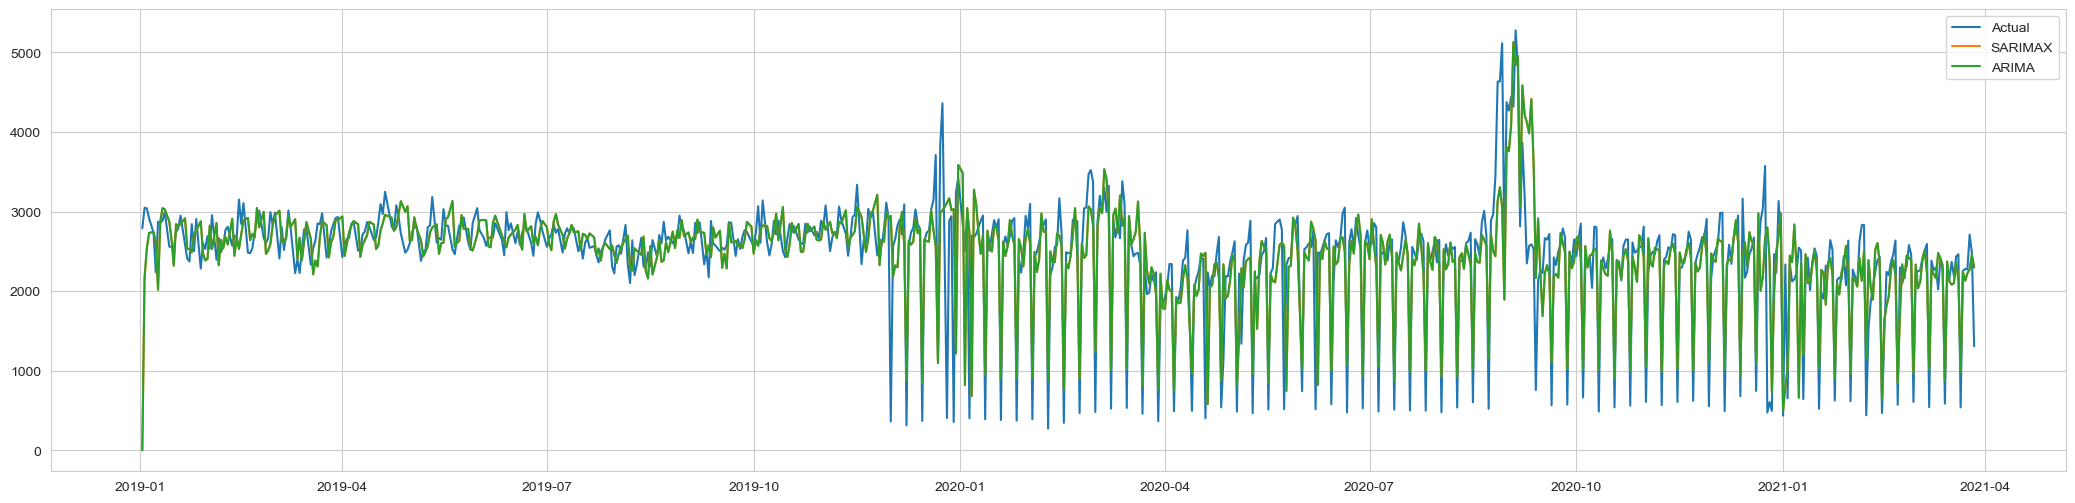

In [25]:
# Forecast for full time series 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

model = SARIMAX(store['n_transactions'], order=(7, 1, 1), seasonal_order=(0, 0, 0, 7))
model_fit = model.fit()

forecast_sarimax = model_fit.predict()

# Get the actual sales for the forecast period
actual = store['n_transactions']

mse = mean_squared_error(actual, forecast_sarimax)
mae = mean_absolute_error(actual, forecast_sarimax)
mape = mean_absolute_percentage_error(actual, forecast_sarimax)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'RMSE: {rmse:.3f}')
# AIC - Akaike Information Criterion
print(f'AIC: {model_fit.aic:.3f}')
# BIC - Bayesian Information Criterion
print(f'BIC: {model_fit.bic:.3f}')

# plot the forecast vs actual
plt.figure(figsize=(26, 6))
plt.plot(store['n_transactions'], label='Actual')
plt.plot(forecast_sarimax, label='SARIMAX')
plt.plot(forecast_arima, label='ARIMA')

plt.legend()
plt.show()

In [14]:
# Seasonality is 7 

#  SARIMA model: SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# create empty future dataframe
future = pd.DataFrame(index=pd.date_range(start='2021-03-28', periods=50, freq='D'), columns=['n_transactions'])
future.sort_index(inplace=True)



/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29855D+00    |proj g|=  1.83028D+00

At iterate    5    f=  7.55692D+00    |proj g|=  3.99761D-02

At iterate   10    f=  7.55301D+00    |proj g|=  2.86811D-02

At iterate   15    f=  7.55005D+00    |proj g|=  3.30884D-02

At iterate   20    f=  7.54938D+00    |proj g|=  1.02959D-02

At iterate   25    f=  7.54918D+00    |proj g|=  8.77384D-04

At iterate   30    f=  7.54918D+00    |proj g|=  8.10449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


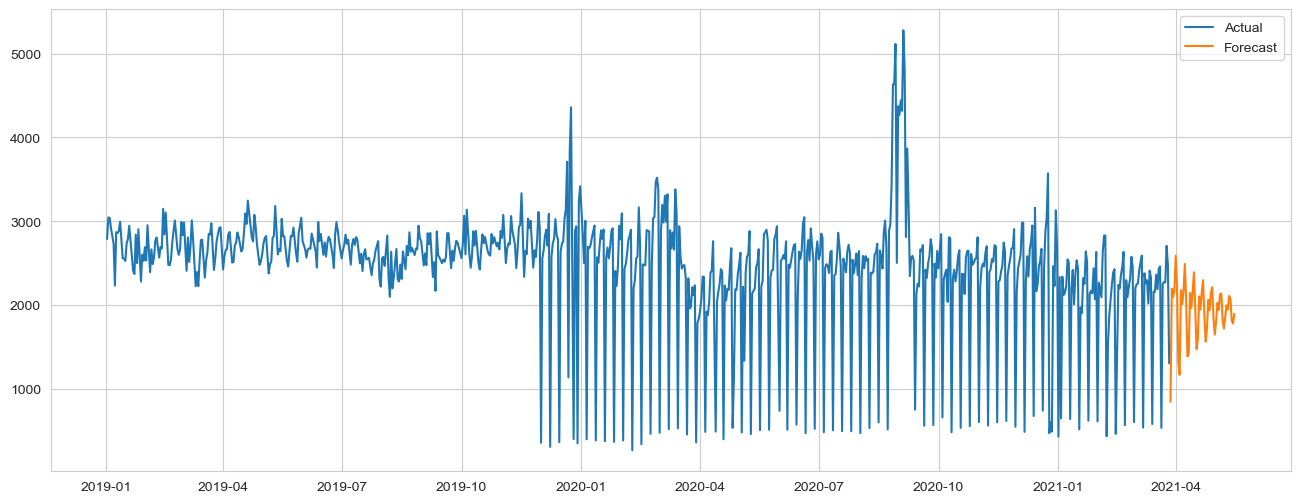

In [20]:
model = SARIMAX(store['n_transactions'], order=(7, 1, 1), seasonal_order=(0, 0, 0, 7))
model_fit = model.fit()

# forecast for the next 50 days of future
forecast_future = model_fit.forecast(steps=50)

# Reset the index of forecast_future
forecast_future.index = future.index

# Fill the future dataframe with the forecast
future['n_transactions'] = forecast_future

# Get the actual sales for the forecast period
actual = store['n_transactions']

# plot the forecast vs actual
plt.figure(figsize=(16, 6))
plt.plot(store['n_transactions'], label='Actual')
plt.plot(future, label='Forecast')
plt.legend()
plt.show()

